<a href="https://colab.research.google.com/github/pmopedro/computational-chess/blob/pedro/notebooks/pedro_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import tensorflow as tf

In [5]:

# Leitura dos dados das partidas de xadrez
proj_folder = './'
datainfo = proj_folder + 'chessData.csv'
df = pd.read_csv(datainfo)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645614 entries, 0 to 645613
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   FEN         645614 non-null  object
 1   Evaluation  645614 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# How this notatio work ? https://en.wikipedia.org/wiki/Forsyth%E2%80%93Edwards_Notation
df.iloc[1,0]

'rnbqkbnr/pppp1ppp/4p3/8/4P3/8/PPPP1PPP/RNBQKBNR w KQkq - 0 2'

In [9]:
!pip install chess

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.8 MB/s eta 0:00:00


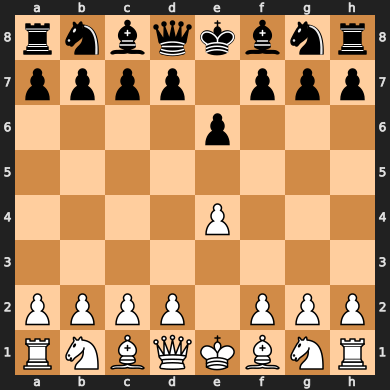

In [10]:
# Let's try to visualize some boards
import chess
board = chess.Board(df.iloc[1,0])
board

In [11]:
def boardstate(fen):
    board = chess.Board(fen[0])
    fstr = str(fen[0])

    if board.has_kingside_castling_rights(chess.WHITE) == True:
        WCKI = 1
    else:
        WCKI = 0
    if board.has_queenside_castling_rights(chess.WHITE) == True:
        WCQ = 1
    else:
        WCQ = 0
    if board.is_check() == True:
        WCH = 1
    else:
        WCH = 0

    if board.has_kingside_castling_rights(chess.BLACK) == True:
        BCKI = 1
    else:
        BCKI = 0
    if board.has_queenside_castling_rights(chess.BLACK) == True:
        BCQ = 1
    else:
        BCQ = 0
    if board.was_into_check() == True:
        BCH = 1
    else:
        BCH = 0

    #f = [M, WCKI, WCQ, WCH, BCKI, BCQ, BCH]
    fw = [WCKI, WCQ, WCH]
    fb = [BCKI, BCQ, BCH]

    bstr = str(board)
    bstr = bstr.replace("p", "\ -1")
    bstr = bstr.replace("n", "\ -3")
    bstr = bstr.replace("b", "\ -4")
    bstr = bstr.replace("r", "\ -5")
    bstr = bstr.replace("q", "\ -9")
    bstr = bstr.replace("k", "\ -100")
    bstr = bstr.replace("P", "\ 1")
    bstr = bstr.replace("N", "\ 3")
    bstr = bstr.replace("B", "\ 4")
    bstr = bstr.replace("R", "\ 5")
    bstr = bstr.replace("Q", "\ 9")
    bstr = bstr.replace("K", "\ 100")
    bstr = bstr.replace(".", "\ 0")
    bstr = bstr.replace("\ ", ",")
    bstr = bstr.replace("'", " ")
    bstr = bstr.replace("\n", "")
    bstr = bstr.replace(" ", "")
    bstr = bstr[1:]
    bstr = eval(bstr)
    bstr = list(bstr)
    if "w" not in fstr:
        for i in range(len(bstr)):
            bstr[i] = bstr[i] * -1
        bstr.reverse()
        fs = fb
        fb = fw
        fw = fs


    BITBOARD = fw + fb + bstr


    return BITBOARD

In [12]:
def strfix(fen, tr):

    fstr = str(fen)

    if '#' in str(tr):
        if '-' in tr:
            t = -10000
        else:
            t = 10000
    elif '\ufeff+23' in str(tr):
        t = 0
    else:
        t = int(float(tr))

    # check if this actually helps hurts or even makes sense

    # check if this actually helps hurts or even makes sense

    # check if this actually helps hurts or even makes sense

    #by this i mean fliping every black evaluation
    if "w" not in fstr:
        t = t*-1



    t = t/10
    #try:
    #    t = int(t)
    #except ValueError:
    #    t = 0

    return t

In [13]:
# interesting project  https://github.com/niklasf/web-boardimage

In [14]:
def fen_to_board(fen):
    board = []
    for row in fen.split('/'):
        brow = []
        for c in row:
            if c == ' ':
                break
            elif c in '12345678':
                brow.extend( ['--'] * int(c) )
            elif c == 'p':
                brow.append( 'bp' )
            elif c == 'P':
                brow.append( 'wp' )
            elif c > 'Z':
                brow.append( 'b'+c.upper() )
            else:
                brow.append( 'w'+c )

        board.append( brow )
    return board

In [15]:
!pip install chess

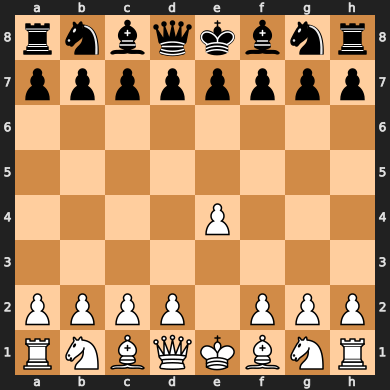

In [16]:
import chess
chess.Board(df.iloc[0,0])

In [17]:
fen_to_board(df.iloc[0,0])

[['bR', 'bN', 'bB', 'bQ', 'bK', 'bB', 'bN', 'bR'],
 ['bp', 'bp', 'bp', 'bp', 'bp', 'bp', 'bp', 'bp'],
 ['--', '--', '--', '--', '--', '--', '--', '--'],
 ['--', '--', '--', '--', '--', '--', '--', '--'],
 ['--', '--', '--', '--', 'wp', '--', '--', '--'],
 ['--', '--', '--', '--', '--', '--', '--', '--'],
 ['wp', 'wp', 'wp', 'wp', '--', 'wp', 'wp', 'wp'],
 ['wR', 'wN', 'wB', 'wQ', 'wK', 'wB', 'wN', 'wR']]

In [18]:
df.dropna(inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645614 entries, 0 to 645613
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   FEN         645614 non-null  object
 1   Evaluation  645614 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [20]:
label_columns = [1]

data_features = df.drop(columns=df.iloc[:, label_columns])

# data_features = data_features.head(4000000)

# cut out the line below apply the fen check and then cut the collumn containing the fens because right now the evaluation flips are still completely missaligned

#data_labels = data.iloc[:, label_columns]

data_labels = df

data_labels.columns = ['col1', 'col2']



# data_labels = data_labels.head(4000000)

data_labels = data_labels.astype(str)
print(data_labels)

data_labels = data_labels.apply(lambda x: strfix(x['col1'], x['col2']), axis=1)


#print(data_features)

print(data_labels)

#print(data_labels.dtypes)

data_features = data_features.apply(boardstate, axis=1)

data_features = data_features.apply(pd.Series)
print(data_features.head())

                                                     col1  col2
0       rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR ...   -10
1       rnbqkbnr/pppp1ppp/4p3/8/4P3/8/PPPP1PPP/RNBQKBN...   +56
2       rnbqkbnr/pppp1ppp/4p3/8/3PP3/8/PPP2PPP/RNBQKBN...    -9
3       rnbqkbnr/ppp2ppp/4p3/3p4/3PP3/8/PPP2PPP/RNBQKB...   +52
4       rnbqkbnr/ppp2ppp/4p3/3p4/3PP3/8/PPPN1PPP/R1BQK...   -26
...                                                   ...   ...
645609     R7/5ppk/8/1pn1r3/1P2pN2/4P2P/5PPK/8 b - - 0 39  +101
645610     R7/5ppk/8/1p2r3/1P2pN2/3nP2P/5PPK/8 w - - 1 40  +137
645611      R7/5ppk/8/1p2r3/1P2p3/3NP2P/5PPK/8 b - - 0 40  +106
645612        R7/5ppk/8/1p2r3/1P6/3pP2P/5PPK/8 w - - 0 41  +134
645613       3R4/5ppk/8/1p2r3/1P6/3pP2P/5PPK/8 b - - 1 41  +123

[645614 rows x 2 columns]
0          1.0
1          5.6
2          0.9
3          5.2
4          2.6
          ... 
645609   -10.1
645610    13.7
645611   -10.6
645612    13.4
645613   -12.3
Length: 645614, dtype: float64
   0   1 

In [21]:
# try:
#   df = pd.read_csv("preprocessed.csv")
# except:
#   raise "banana"
# # df.to_csv("preprocessed.csv")

In [22]:
# df= df.drop(columns=["Unnamed: 0"])

In [23]:
import numpy as np
input2_columns = [0, 1, 2, 3, 4, 5]


inputboard = data_features.drop(columns=data_features.iloc[:, input2_columns])

#print(inputboard.dtypes)

inputboard = np.array(inputboard)
#print(inputboard.shape)

print(inputboard)


inputmeta = data_features.iloc[:, input2_columns]

#print(inputmeta.dtypes)

inputmeta = np.array(inputmeta)
#print(inputmeta.shape)

#print(inputmeta)

[[-5 -3 -4 ...  4  3  5]
 [-5 -3 -4 ...  4  3  5]
 [-5 -3 -4 ...  4  3  5]
 ...
 [ 0  0  0 ...  0  0 -5]
 [ 5  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


In [24]:
data_features = data_features.to_numpy()
data_labels = data_labels.to_numpy()

In [25]:
from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(inputboard, data_labels, test_size=0.10, random_state=42)

In [26]:
!pip install matplotlib-inline

In [28]:
import tensorflow as tf
import os
import numpy as np

# Assuming x_train, x_test, y_train, y_test are your input data

# Convert input data to float32
# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')

# # Reshape to be [samples][width][height][channels]
# x_train = x_train.reshape(x_train.shape[0], 8, 8, 1)
# x_test = x_test.reshape(x_test.shape[0], 8, 8, 1)
# from keras.layers import Concatenate

# model1 = tf.keras.models.Sequential()
# model1.add(tf.keras.layers.Reshape(target_shape=(8, 8, 1)))
# model1.add(tf.keras.layers.Conv2D(kernel_size=(8,8), padding="same", activation="relu", filters=64))
# model1.add(tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=1e-05))
# model1.add(tf.keras.layers.Conv2D(kernel_size=(8,8), padding="same", activation="relu", filters=64))
# model1.add(tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=1e-05))
# model1.add(tf.keras.layers.Flatten())

# model2 = tf.keras.models.Sequential()
# model2.add(tf.keras.layers.Input(shape=(6,)))

# conc = Concatenate([model1,  model2])

# # model = Model(inputs=[model, model2], outputs=merge_two)

# model3= tf.keras.models.Sequential()
# model3.add(tf.keras.layers.Dense(1024, activation='relu'))
# model3.add(tf.keras.layers.Dense(512, activation='relu'))
# model3.add(tf.keras.layers.Dense(256, activation='relu'))
# model3.add(tf.keras.layers.Dense(256, activation='relu'))
# model3.add(tf.keras.layers.Dense(1, activation='softmax'))


# model = Concatenate([conc,model3])

input1 = tf.keras.layers.Input(shape=(64,))
shape1 = tf.keras.layers.Reshape(target_shape=(8, 8, 1))(input1)
conv1 = tf.keras.layers.Conv2D(kernel_size=(8,8), padding="same", activation="relu", filters=64, input_shape=(8,8,1))(shape1)
bn1 = tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=1e-05)(conv1)
conv2 = tf.keras.layers.Conv2D(kernel_size=(8,8), padding="same", activation="relu", filters=64, input_shape=(8,8,1))(bn1)
bn2 = tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=1e-05)(conv2)
flatten1 = tf.keras.layers.Flatten()(bn2)
input2 = tf.keras.layers.Input(shape=(6,))

conc = tf.keras.layers.concatenate([flatten1,input2])

Denselayer1 = tf.keras.layers.Dense(1024, activation='relu')(conc)

Denselayer2 = tf.keras.layers.Dense(512, activation='relu')(Denselayer1)
Denselayer2 = tf.keras.layers.Dropout(0.3)(Denselayer2)
Denselayer3 = tf.keras.layers.Dense(512, activation='relu')(Denselayer2)
Denselayer2 = tf.keras.layers.Dropout(0.4)(Denselayer2)
Denselayer4 = tf.keras.layers.Dense(256, activation='relu')(Denselayer3)
Denselayer4 = tf.keras.layers.Dropout(0.3)(Denselayer4)
Denselayer4 = tf.keras.layers.Dense(64, activation='relu')(Denselayer3)
Denselayer4 = tf.keras.layers.Dense(32, activation='relu')(Denselayer3)
Output = tf.keras.layers.Dense(1, activation='linear')(Denselayer4)



data_model = tf.keras.models.Model(inputs=[input1, input2], outputs=Output)

predictions = data_model([(inputboard[:1]), (inputmeta[:1])]).numpy


data_model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=["mean_absolute_error"])

data_model.fit([inputboard, inputmeta], data_labels, epochs=10, batch_size=20000, shuffle=True)
data_model.summary()
# Evaluate the model on the test data using `evaluate`
# print("Evaluate on test data")
# results = model.evaluate(x_test, y_test)
# print("test loss, test acc:", results)
model_json = data_model.to_json()
json_file = open("model_CNN4_large.json", "w")
json_file.write(model_json)
json_file.close()
data_model.save_weights("model_CNN4_large.h5")
print("Model saved to disk")
os.getcwd()

Epoch 1/10
33/33 [==============================] - 28s 421ms/step - loss: 13756.2070 - mean_absolute_error: 34.9657
Epoch 2/10
33/33 [==============================] - 12s 359ms/step - loss: 13538.6074 - mean_absolute_error: 35.2932
Epoch 3/10
33/33 [==============================] - 12s 359ms/step - loss: 13363.6953 - mean_absolute_error: 35.5290
Epoch 4/10
33/33 [==============================] - 12s 364ms/step - loss: 13204.7959 - mean_absolute_error: 35.7607
Epoch 5/10
33/33 [==============================] - 12s 362ms/step - loss: 12935.3525 - mean_absolute_error: 35.8299
Epoch 6/10
33/33 [==============================] - 12s 362ms/step - loss: 12694.5762 - mean_absolute_error: 35.8908
Epoch 7/10
33/33 [==============================] - 12s 363ms/step - loss: 12534.7314 - mean_absolute_error: 35.8511
Epoch 8/10
33/33 [==============================] - 12s 368ms/step - loss: 12317.4365 - mean_absolute_error: 35.8164
Epoch 9/10
33/33 [==============================] - 12s 368ms/st

'/content'